In [24]:
from astropy.io import fits
import numpy as np

In [34]:
g = fits.getdata('/work/sc004/sc004/tc1213/astrodet/dataset/test/set_50/img_g.fits', memmap=False)
r = fits.getdata('/work/sc004/sc004/tc1213/astrodet/dataset/test/set_50/img_r.fits', memmap=False)
z = fits.getdata('/work/sc004/sc004/tc1213/astrodet/dataset/test/set_50/img_z.fits', memmap=False)

In [35]:
I = (z + r + g)/3.0

In [36]:
length, width = g.shape
image = np.empty([length, width, 3], dtype=np.uint8)

In [43]:
stretch=5
Q=10
m=0

In [50]:
np.arcsinh(stretch*Q*(I - m))/(Q*I)

/tmp/ipykernel_4128615/2506104536.py:1: RuntimeWarning: invalid value encountered in divide
  np.arcsinh(stretch*Q*(I - m))/(Q*I)


array([[3.12609414e-05, 2.68857262e-05, 2.97349131e-05, ...,
        7.37947653e-03,            nan,            nan],
       [3.80718129e-05, 1.50048538e-05, 3.77976474e-05, ...,
        5.91458786e-04,            nan, 9.38047546e-04],
       [7.16479115e-05, 8.81993658e-05, 4.26427147e-05, ...,
                   nan, 1.85376241e-03,            nan],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])

In [44]:
z = z*np.arcsinh(stretch*Q*(I - m))/(Q*I)
r = r*np.arcsinh(stretch*Q*(I - m))/(Q*I)
g = g*np.arcsinh(stretch*Q*(I - m))/(Q*I)

/tmp/ipykernel_4128615/463645019.py:1: RuntimeWarning: invalid value encountered in divide
  z = z*np.arcsinh(stretch*Q*(I - m))/(Q*I)


In [41]:
z = np.nan_to_num(z)
z

array([[1.45943577e-05, 1.31592391e-05, 1.68106828e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.02425446e-05, 2.03038004e-05, 3.08869828e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.48161644e-05, 4.72636534e-05, 3.18419963e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [17]:
import torch
from torchvision import models
from torchsummary import summary

In [15]:
model = torch.load('/work/sc004/sc004/tc1213/astrodet/output/model_temp.pth', map_location=torch.device('cpu'))

In [18]:
summary(model, (3, 512, 512))

AttributeError: 'dict' object has no attribute 'apply'

In [23]:
for i in model['model']:
    print(i)

backbone.stem.conv1.weight
backbone.stem.conv1.norm.weight
backbone.stem.conv1.norm.bias
backbone.stem.conv1.norm.running_mean
backbone.stem.conv1.norm.running_var
backbone.res2.0.shortcut.weight
backbone.res2.0.shortcut.norm.weight
backbone.res2.0.shortcut.norm.bias
backbone.res2.0.shortcut.norm.running_mean
backbone.res2.0.shortcut.norm.running_var
backbone.res2.0.conv1.weight
backbone.res2.0.conv1.norm.weight
backbone.res2.0.conv1.norm.bias
backbone.res2.0.conv1.norm.running_mean
backbone.res2.0.conv1.norm.running_var
backbone.res2.0.conv2.weight
backbone.res2.0.conv2.norm.weight
backbone.res2.0.conv2.norm.bias
backbone.res2.0.conv2.norm.running_mean
backbone.res2.0.conv2.norm.running_var
backbone.res2.0.conv3.weight
backbone.res2.0.conv3.norm.weight
backbone.res2.0.conv3.norm.bias
backbone.res2.0.conv3.norm.running_mean
backbone.res2.0.conv3.norm.running_var
backbone.res2.1.conv1.weight
backbone.res2.1.conv1.norm.weight
backbone.res2.1.conv1.norm.bias
backbone.res2.1.conv1.norm.run

In [28]:
model['model']['backbone.stem.conv1.weight'].shape

torch.Size([64, 3, 7, 7])

In [1]:
import detectron2
import torch

/work/sc004/sc004/tc1213/miniconda3/envs/b31xs/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(torch.__version__)
print(detectron2.__version__)

1.13.0+cu117
0.6


In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data import build_detection_train_loader
from detectron2.engine import DefaultTrainer
from detectron2.engine import SimpleTrainer
from detectron2.engine import HookBase
from typing import Dict, List, Optional
import detectron2.solver as solver
import detectron2.modeling as modeler
import detectron2.data as data
import detectron2.data.transforms as T
import detectron2.checkpoint as checkpointer
from detectron2.data import detection_utils as utils
import weakref
import copy
import torch
import time
from detectron2.structures import BoxMode
from astropy.io import fits
import glob

from astrodet import astrodet as toolkit

# Prettify the plotting
from astrodet.astrodet import set_mpl_style

/work/sc004/sc004/tc1213/miniconda3/envs/b31xs/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_astro_dicts(img_dir):
        
    # It's weird to call this img_dir
    set_dirs = sorted(glob.glob('%s/set_*' % img_dir))
    
    dataset_dicts = []
    
    # Loop through each set
    for idx, set_dir in enumerate(set_dirs):
        record = {}
        
        mask_dir = os.path.join(img_dir, set_dir, "masks.fits")
        filename = os.path.join(img_dir, set_dir, "img")
        
        # Open each FITS image
        with fits.open(mask_dir, memmap=False, lazy_load_hdus=False) as hdul:
            sources = len(hdul)
            height, width = hdul[0].data.shape
            data = [hdu.data/np.max(hdu.data) for hdu in hdul]
            category_ids = [hdu.header["CLASS_ID"] for hdu in hdul]
            
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
        objs = []
        
        # Mask value thresholds per category_id
        thresh = [0.005 if i == 1 else 0.08 for i in category_ids]
        
        # Generate segmentation masks
        for i in range(sources):
            image = data[i]
            mask = np.zeros([height, width], dtype=np.uint8)
            # Create mask from threshold
            mask[:,:][image > thresh[i]] = 1
            # Smooth mask
            mask[:,:] = cv2.GaussianBlur(mask[:,:], (9,9), 2)
            
            # https://github.com/facebookresearch/Detectron/issues/100
            contours, hierarchy = cv2.findContours((mask).astype(np.uint8), cv2.RETR_TREE,
                                                        cv2.CHAIN_APPROX_SIMPLE)
            # mask_new, contours, hierarchy = cv2.findContours((mask).astype(np.uint8), cv2.RETR_TREE,
            segmentation = []
            for contour in contours:
                x,y,w,h = cv2.boundingRect(contour)
                contour = contour.flatten().tolist()
                # segmentation.append(contour)
                if len(contour) > 4:
                    segmentation.append(contour)
            # No valid countors
            if len(segmentation) == 0:
                continue
            
            # Add to dict
            obj = {
                "bbox": [x, y, w, h],
                "area": w*h,
                "bbox_mode": BoxMode.XYWH_ABS,
                "segmentation": segmentation,
                "category_id": category_ids[i] - 1,
            }
            objs.append(obj)
            
        record["annotations"] = objs
        dataset_dicts.append(record)
         
    return dataset_dicts

In [3]:
dirpath = '/work/sc004/sc004/tc1213/astrodet/dataset/' # Path to dataset
dataset_names = ['train', 'test', 'val'] 

for i, d in enumerate(dataset_names):
    filenames_dir = os.path.join(dirpath,d)
    DatasetCatalog.register("astro_" + d, lambda: get_astro_dicts(filenames_dir))
    MetadataCatalog.get("astro_" + d).set(thing_classes=["star", "galaxy"], things_colors = ['blue', 'gray'])
astro_metadata = MetadataCatalog.get("astro_train")

In [6]:
dataset_dicts = {}
d = 'test'
print(f'Loading {d}')
dataset_dicts[d] = get_astro_dicts(os.path.join(dirpath, d))

Loading test


In [17]:
dataset_dicts['test'][46]

{'file_name': '/work/sc004/sc004/tc1213/astrodet/dataset/test/set_50/img',
 'image_id': 46,
 'height': 512,
 'width': 512,
 'annotations': [{'bbox': [498, 77, 12, 12],
   'area': 144,
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'segmentation': [[501,
     77,
     499,
     79,
     499,
     80,
     498,
     81,
     498,
     84,
     499,
     85,
     499,
     86,
     500,
     86,
     501,
     87,
     502,
     87,
     503,
     88,
     505,
     88,
     506,
     87,
     507,
     87,
     507,
     86,
     508,
     85,
     508,
     84,
     509,
     83,
     509,
     79,
     507,
     77]],
   'category_id': 1},
  {'bbox': [273, 59, 10, 13],
   'area': 130,
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'segmentation': [[275,
     59,
     275,
     60,
     273,
     62,
     273,
     68,
     274,
     69,
     274,
     70,
     275,
     70,
     276,
     71,
     278,
     71,
     279,
     70,
     280,
     70,
     280,
     69,
     281,
     68,
     281,

In [4]:
import detectron2.checkpoint as checkpointer

In [7]:
output_dir = '/work/sc004/sc004/tc1213/astrodet/output/'
init_coco_weights = True # Start training from MS COCO weights

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml")) # Get model structure
cfg.DATASETS.TRAIN = ("astro_train") # Register Metadata
cfg.DATASETS.TEST = ("astro_val") # Config calls this TEST, but it should be the val dataset
cfg.TEST.EVAL_PERIOD = 40
cfg.DATALOADER.NUM_WORKERS = 1
if init_coco_weights:
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml")  # Initialize from MS COCO
else:
    cfg.MODEL.WEIGHTS = os.path.join(output_dir, 'model_temp.pth')  # Initialize from a local weights
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001   # pick a good LR -- start from 0.005
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.SOLVER.MAX_ITER = 100    # for DefaultTrainer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.OUTPUT_DIR = output_dir
cfg.TEST.DETECTIONS_PER_IMAGE = 1000

In [8]:
model = modeler.build_model(cfg)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [5]:
checkpointer = checkpointer.DetectionCheckpointer(
            # Assume you want to save checkpoints together with logs/statistics
            # model,
            # cfg.OUTPUT_DIR
        )

TypeError: DetectionCheckpointer.__init__() missing 1 required positional argument: 'model'

In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data import build_detection_train_loader
from detectron2.engine import DefaultTrainer
from detectron2.engine import SimpleTrainer
from detectron2.engine import HookBase
from typing import Dict, List, Optional
import detectron2.solver as solver
import detectron2.modeling as modeler
import detectron2.data as data
import detectron2.data.transforms as T
import detectron2.checkpoint as checkpointer
from detectron2.data import detection_utils as utils
import weakref
import copy
import torch
import time

from astrodet import astrodet as toolkit

/work/sc004/sc004/tc1213/miniconda3/envs/b31xs/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Print some versions so we know what works
print(torch.__version__)
print(detectron2.__version__)

1.13.0+cu117
0.6


In [3]:
# Prettify the plotting
from astrodet.astrodet import set_mpl_style
set_mpl_style()

In [7]:
dirpath = '/work/sc004/sc004/tc1213/astrodet/dataset/' # Path to dataset
output_dir = './work/sc004/sc004/tc1213/astrodet/output/'

dataset_names = ['trainingset', 'testset', 'validationset'] 

In [13]:
from detectron2.structures import BoxMode
from astropy.io import fits
import glob

def get_astro_dicts(img_dir):
        
    # It's weird to call this img_dir
    set_dirs = sorted(glob.glob('%s/set_*' % img_dir))
    
    dataset_dicts = []
    
    # Loop through each set
    for idx, set_dir in enumerate(set_dirs):
        record = {}
        
        mask_dir = os.path.join(img_dir, set_dir, "masks.fits")
        filename = os.path.join(img_dir, set_dir, "img")
        
        # Open each FITS image
        with fits.open(mask_dir, memmap=False, lazy_load_hdus=False) as hdul:
            sources = len(hdul)
            height, width = hdul[0].data.shape
            data = [hdu.data/np.max(hdu.data) for hdu in hdul]
            category_ids = [hdu.header["CLASS_ID"] for hdu in hdul]
            
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
        objs = []
        
        # Mask value thresholds per category_id
        thresh = [0.005 if i == 1 else 0.08 for i in category_ids]
        
        # Generate segmentation masks
        for i in range(sources):
            image = data[i]
            mask = np.zeros([height, width], dtype=np.uint8)
            # Create mask from threshold
            mask[:,:][image > thresh[i]] = 1
            # Smooth mask
            mask[:,:] = cv2.GaussianBlur(mask[:,:], (9,9), 2)
            
            # https://github.com/facebookresearch/Detectron/issues/100
            contours, hierarchy = cv2.findContours((mask).astype(np.uint8), cv2.RETR_TREE,
                                                        cv2.CHAIN_APPROX_SIMPLE)
            # mask_new, contours, hierarchy = cv2.findContours((mask).astype(np.uint8), cv2.RETR_TREE,
            segmentation = []
            for contour in contours:
                x,y,w,h = cv2.boundingRect(contour)
                contour = contour.flatten().tolist()
                # segmentation.append(contour)
                if len(contour) > 4:
                    segmentation.append(contour)
            # No valid countors
            if len(segmentation) == 0:
                continue
            
            # Add to dict
            obj = {
                "bbox": [x, y, w, h],
                "area": w*h,
                "bbox_mode": BoxMode.XYWH_ABS,
                "segmentation": segmentation,
                "category_id": category_ids[i] - 1,
            }
            objs.append(obj)
            
        record["annotations"] = objs
        dataset_dicts.append(record)
         
    return dataset_dicts


for i, d in enumerate(dataset_names):
    filenames_dir = os.path.join(dirpath,d)
    DatasetCatalog.register("astro_" + d, lambda: get_astro_dicts(filenames_dir))
    MetadataCatalog.get("astro_" + d).set(thing_classes=["star", "galaxy"], things_colors = ['blue', 'gray'])
astro_metadata = MetadataCatalog.get("astro_train")

AssertionError: Dataset 'astro_trainingset' is already registered!

In [10]:
def read_image(filename, normalize='lupton', stretch=5, Q=10, m=0, ceil_percentile=99.995, dtype=np.uint8):
    
    # Read image
    g = fits.getdata(os.path.join(filename+'_g.fits'), memmap=False)
    r = fits.getdata(os.path.join(filename+'_r.fits'), memmap=False)
    z = fits.getdata(os.path.join(filename+'_z.fits'), memmap=False)
    
    # Contrast scaling / normalization
    I = (z + r + g)/3.0
    
    length, width = g.shape
    image = np.empty([length, width, 3], dtype=dtype)
    
    # Options for contrast scaling
    if normalize.lower() == 'lupton':
        z = z*np.arcsinh(stretch*Q*(I - m))/(Q*I)
        r = r*np.arcsinh(stretch*Q*(I - m))/(Q*I)
        g = g*np.arcsinh(stretch*Q*(I - m))/(Q*I)
    elif normalize.lower() == 'zscore':
        Isigma = I*np.mean([np.nanstd(g), np.nanstd(r), np.nanstd(z)])
        z = (z - np.nanmean(z) - m)/Isigma
        r = (r - np.nanmean(r) - m)/Isigma
        g = (g - np.nanmean(g) - m)/Isigma
    elif normalize.lower() == 'linear':
        z = (z - m)/I
        r = (r - m)/I
        g = (g - m)/I
    else:
        print('Normalize keyword not recognized.')

    max_RGB = np.nanpercentile([z, r, g], ceil_percentile) * 2
    # avoid saturation
    r = r/max_RGB; g = g/max_RGB; z = z/max_RGB

    # Rescale to 0-255 for dtype=np.uint8
    max_dtype = np.iinfo(dtype).max
    r = r*max_dtype
    g = g*max_dtype
    z = z*max_dtype

    # 0-255 RGB image
    image[:,:,0] = z # R
    image[:,:,1] = r # G
    image[:,:,2] = g # B
    
    return image

In [14]:
dataset_dicts = {}
for i, d in enumerate(dataset_names):
    print(f'Loading {d}')
    dataset_dicts[d] = get_astro_dicts(os.path.join(dirpath, d))

Loading trainingset
Loading testset
Loading validationset


In [15]:
print(astro_metadata)

Metadata(name='astro_train', thing_classes=['star', 'galaxy'], things_colors=['blue', 'gray'])


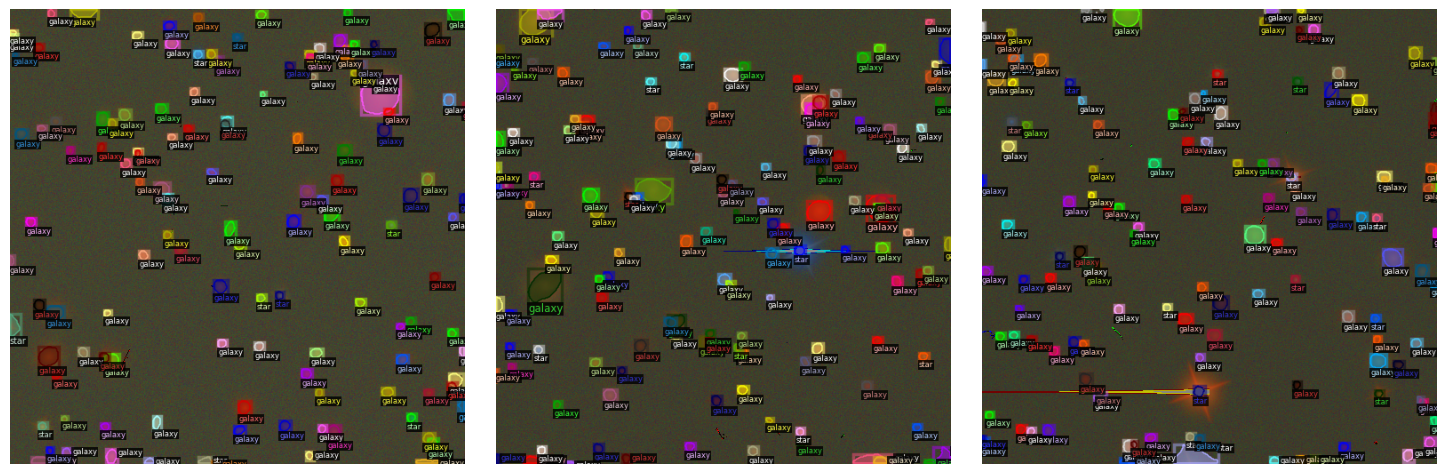

In [17]:
nsample = 3 # Number of example images to plot
fig, axs = plt.subplots(1, nsample, figsize=(5*nsample, 5))

for i, d in enumerate(random.sample(dataset_dicts['trainingset'], nsample)):
    # Use the Lupton scaling for better visualization
    img = read_image(d["file_name"], normalize="lupton", stretch=5, Q=1, ceil_percentile=99.5)
    visualizer = Visualizer(img, metadata=astro_metadata)
    # Plot the figures
    out = visualizer.draw_dataset_dict(d)
    axs[i].imshow(out.get_image())
    axs[i].axis('off')
    fig.tight_layout()
    fig.show()

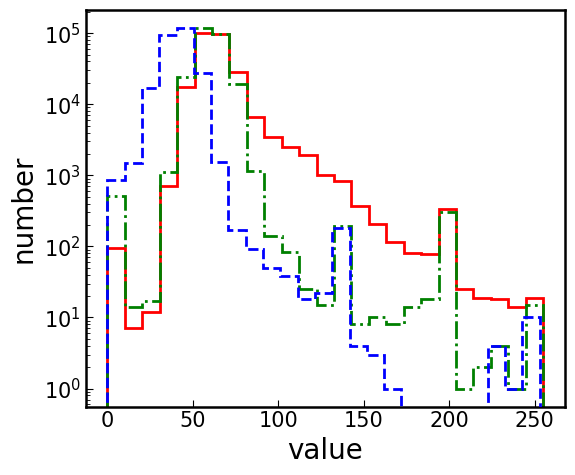

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
bins = 25
ax.hist(img[:,:,0].flatten(), histtype="step", bins=bins, log=True, color="r", lw=2, zorder=1);
ax.hist(img[:,:,1].flatten(), histtype="step", bins=bins, log=True, color="g", lw=2, linestyle='-.', zorder=2);
ax.hist(img[:,:,2].flatten(), histtype="step", bins=bins, log=True, color="b", lw=2, linestyle='dashed', zorder=3);
ax.set_xlabel('value', fontsize=20)
ax.set_ylabel('number', fontsize=20)
fig.tight_layout()

In [19]:
def train_mapper(dataset_dict, **read_image_args):

    dataset_dict = copy.deepcopy(dataset_dict)  # it will be modified by code below
    
    image = read_image(dataset_dict["file_name"], **read_image_args)
    augs = T.AugmentationList([
        T.RandomRotation([-90, 90, 180], sample_style='choice'),
        T.RandomFlip(prob=0.5),
        T.Resize((512,512))
    ])
    # Data Augmentation
    auginput = T.AugInput(image)
    # Transformations to model shapes
    transform = augs(auginput)
    image = torch.from_numpy(auginput.image.copy().transpose(2, 0, 1))
    annos = [
        utils.transform_instance_annotations(annotation, [transform], image.shape[1:])
        for annotation in dataset_dict.pop("annotations")
    ]
    return {
       # create the format that the model expects
        "image": image,
        "image_shaped": auginput.image,
        "height": 512,
        "width": 512,
        "image_id": dataset_dict["image_id"],
        "instances": utils.annotations_to_instances(annos, image.shape[1:]),
    }

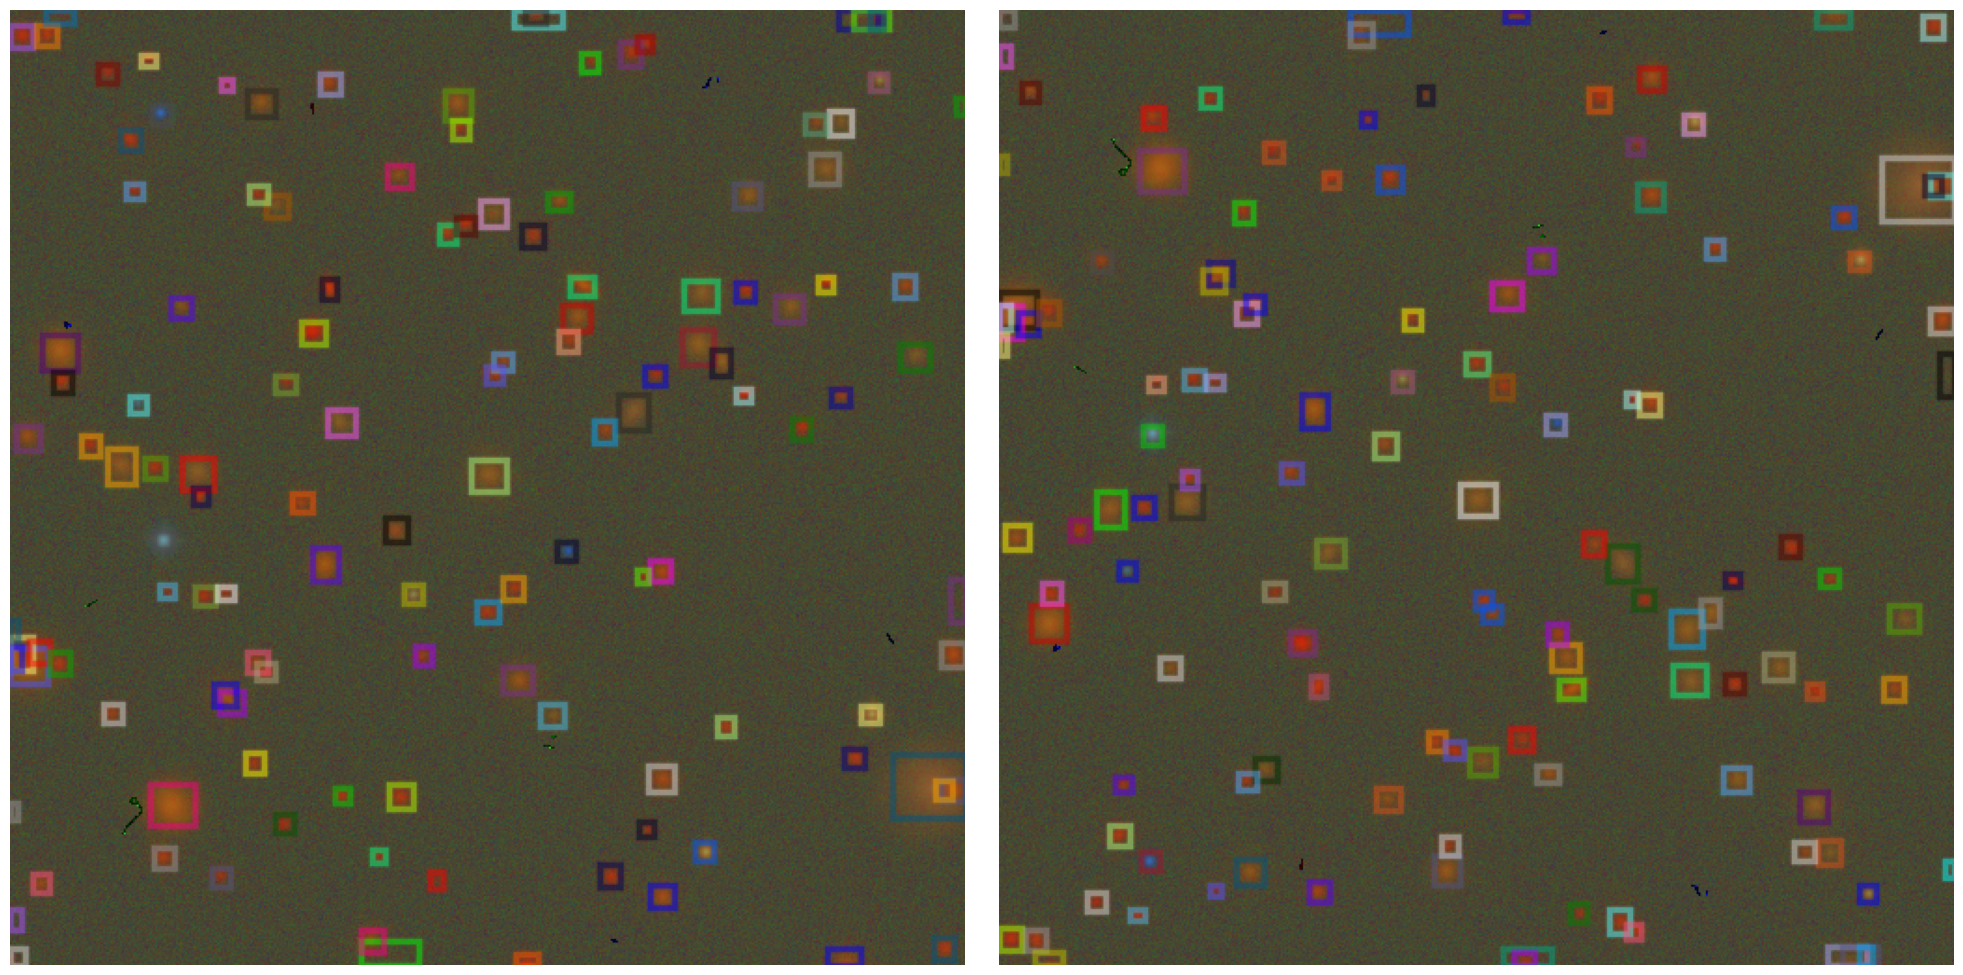

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10*2, 10))

dictionary = iter(dataset_dicts['trainingset'])
d = next(dictionary)

img = read_image(d["file_name"], normalize="lupton", stretch=5, Q=1, ceil_percentile=99.5)
visualizer = Visualizer(img, metadata=astro_metadata, scale=1)
# Get the ground truth boxes
gt_boxes = np.array([a['bbox'] for a in d['annotations']])
# Convert to the mode visualizer expects
gt_boxes = BoxMode.convert(gt_boxes, BoxMode.XYWH_ABS, BoxMode.XYXY_ABS)
out = visualizer.overlay_instances(boxes=gt_boxes)
axs[0].imshow(out.get_image())
axs[0].axis('off')

aug_d = train_mapper(d, normalize="lupton", stretch=5, Q=1, ceil_percentile=99.5)
img_aug = aug_d["image_shaped"]
visualizer = Visualizer(img_aug, metadata=astro_metadata, scale=1)
# Convert to the mode visualizer expects
out = visualizer.overlay_instances(boxes=aug_d['instances'].gt_boxes)
axs[1].imshow(out.get_image())
axs[1].axis('off')
fig.tight_layout()
fig.show()

In [22]:
init_coco_weights = True # Start training from MS COCO weights

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml")) # Get model structure
cfg.DATASETS.TRAIN = ("astro_train") # Register Metadata
cfg.DATASETS.TEST = ("astro_val") # Config calls this TEST, but it should be the val dataset
cfg.TEST.EVAL_PERIOD = 40
cfg.DATALOADER.NUM_WORKERS = 1
if init_coco_weights:
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_3x.yaml")  # Initialize from MS COCO
else:
    cfg.MODEL.WEIGHTS = os.path.join(output_dir, 'model_temp.pth')  # Initialize from a local weights
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001   # pick a good LR -- start from 0.005
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.SOLVER.MAX_ITER = 100    # for DefaultTrainer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.OUTPUT_DIR = output_dir
cfg.TEST.DETECTIONS_PER_IMAGE = 1000
saveHook = toolkit.SaveHook()
saveHook.set_output_name("model_temp")
hookList = [saveHook]

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
model = modeler.build_model(cfg)
optimizer = solver.build_optimizer(cfg, model)
loader = data.build_detection_train_loader(cfg, mapper=train_mapper)
print(type(optimizer))

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx